In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import numpy as np

In [2]:
data = pd.read_csv("sensor_data_700.txt", delimiter=" ", header=None, names=("date", "time", "ir", "lidar"))

In [7]:
d = data[(data["time"] < 160000) & (data["time"] >= 120000)]
d = d.loc[:, ["ir", "lidar"]]

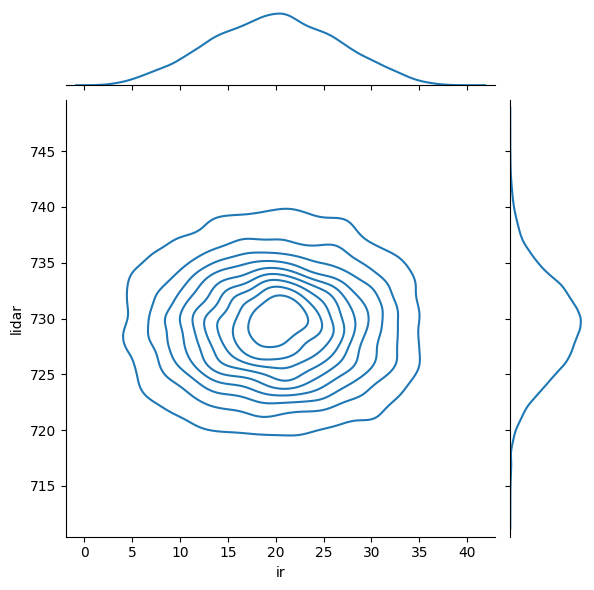

In [10]:
sns.jointplot(x="ir", y="lidar", data=d, kind="kde")
plt.show()

In [11]:
print("光センサの計測値の分散：", d.ir.var())
print("LiDARの計測値の分散：", d.lidar.var())

diff_ir = d.ir - d.ir.mean()
diff_lidar = d.lidar - d.lidar.mean()

a = diff_ir * diff_lidar
print("共分散：", sum(a) / (len(d) - 1))

d.mean()

光センサの計測値の分散： 42.117126367701594
LiDARの計測値の分散： 17.702026469211457
共分散： -0.31677803385436953


ir        19.860247
lidar    729.311958
dtype: float64

In [12]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [14]:
irlidar = multivariate_normal(mean=d.mean().values.T, cov=d.cov().values)

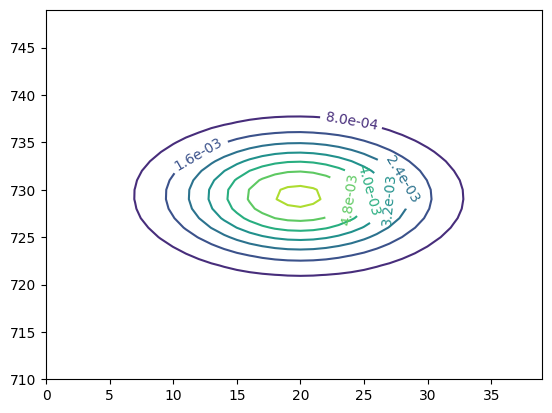

In [16]:
x, y = np.mgrid[0:40, 710:750]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x
pos[:, :, 1] = y
cont = plt.contour(x, y, irlidar.pdf(pos))
cont.clabel(fmt="%1.1e")
plt.show()

In [17]:
print("X座標：", x)
print("Y座標：", y)

X座標： [[ 0  0  0 ...  0  0  0]
 [ 1  1  1 ...  1  1  1]
 [ 2  2  2 ...  2  2  2]
 ...
 [37 37 37 ... 37 37 37]
 [38 38 38 ... 38 38 38]
 [39 39 39 ... 39 39 39]]
Y座標： [[710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 ...
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]
 [710 711 712 ... 747 748 749]]


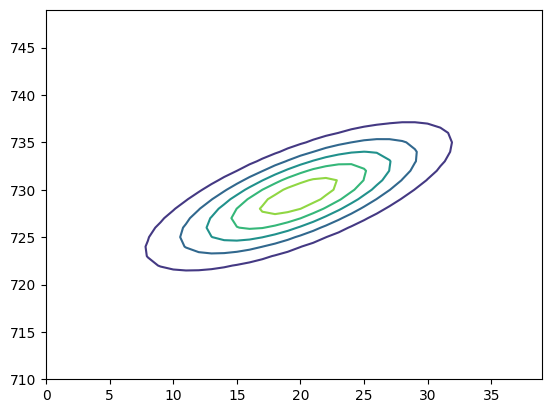

In [18]:
c = d.cov().values + np.array([[0, 20], [20, 0]])
tmp = multivariate_normal(mean=d.mean().values.T, cov=c)
cont = plt.contour(x, y, tmp.pdf(pos))
plt.show()